# Chapter 7. Morse Complex

In [48]:
import sys

sys.path.append("../src")

from environments import MazeEnv
from policies import BaseAgent, QLearningAgent
from dmt import environment_to_graph, classify_simplices, visualize_graph

import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np

from tqdm import tqdm
from copy import deepcopy

In [49]:
# Example 7.34

G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1,2), (1,3), (1,4), (2,4), (3,4)])


{1: Text(0.26748093723656297, -0.4640762313137742, '1'),
 2: Text(0.9999999999999999, 0.5763727688521901, '2'),
 3: Text(-0.999999935053311, -0.5763728815402572, '3'),
 4: Text(-0.2674810021832519, 0.4640763440018409, '4')}

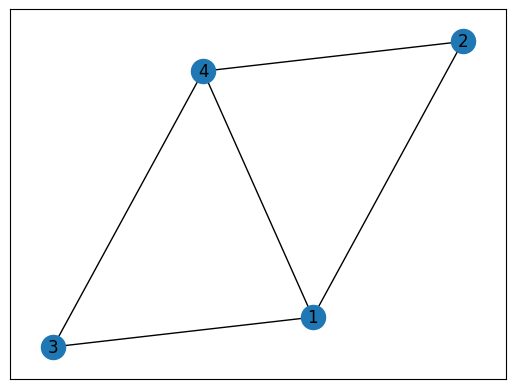

In [50]:
# visualize G:
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

In [42]:
# assume G is connected.

n = len(G.nodes)

# get graph laplacian:
L = nx.laplacian_matrix(G).todense()

# compute eigenvalues of L, retain only nonzero values:
eigvals = np.linalg.eigvals(L)
eigvals = eigvals[eigvals > 1e-10]

# compute number of spanning trees of G:
num_trees = np.round(np.prod(eigvals) / n)

# number of facets of M_P(G):
num_facets = np.round(np.prod(eigvals))

In [44]:
# num_facets is the same as the number of maximum gradient vector fields on G.

In [46]:
print(num_trees)

8.0


In [47]:
print(num_facets)

32.0
